# **Telecommunications Service Provider Customer Churn Data Anlysis**
## A case study of SyriaTel Telecommunications

# **Business Understanding**

SyriaTel is a mobile telecommunications company based in Damascus, Syria. It was founded in the year 2000. From the datset provided, it is evident that SyriaTel provides both local and international calling services. They also have voicemail plans and a customer service department to offer tech support to clients.

### Problem Statement 

Syria wants to identify which customers are likely to churn based on historical data and behavioral patterns. The goal is to enhance overall customer satisfaction by identifying factors that lead them to churn and mitigating them early. 

Retaining customers is not only cost-effective but also contributes to revenue growth. Preventing churn ensures a stable customer base and promotes long-term business sustainability.

According to available reasearch findings linked below, the average churn rate for mobile services is about 20% and reducing churn by just 1% can increase profits by up to 5%. Our objective will be to create a model and gain insights on how to reduce the churn as much as possible.<br>
source: https://www.subscriptionflow.com/2022/11/churn-management-in-telecom-industry/

### Stakeholders 

**SyriaTel senior management:** To identify the factors leading to churn and formulate strategies to mitigate it from our recommendations. <br>
**Technical Support** To identify the technical issues leading to the churn factors the model will highlight and fix them to avoid future customer churn. <br>
**Customer Service** To guide customers out of any hurdles identified by this model to improve customer satisfaction and ultimately retention. <br>

# **Data Understanding**

From the dataset provided, this are the assumed descriptions of each column 

**Unique Identifier**: *phone number*: The unique identifier for each customer's phone number.

**Target**: *churn*: Binary indicator (yes/no) of whether the customer churned (terminated services).

state: The state in which the customer resides.

account length: The duration of time the customer has been subscribed to SyriaTel's services.

area code: The area code associated with the customer's phone number.

international plan: Binary indicator (yes/no) of whether the customer has an international calling plan.

voice mail plan: Binary indicator (yes/no) of whether the customer has a voicemail plan.

number vmail messages: The number of voicemail messages the customer has.

customer service calls: The number of calls made by the customer to the customer service department.
total day/evening/night minutes: The total number of minutes the customer used during the period indicated.

total day/evening/night calls: The total number of calls the customer made during the period indicated.

total day/evening/night charge: The total charge for the period indicated






## Objective

Identify factors leading leading to customer churn from the models created and offer actionable reccomendations and future improvement areas in the form of 'Next Steps' 

# **Data Preparation**

Importing Packages

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#Modelling imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix, f1_score

import seaborn as sns
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV


In [8]:
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [9]:
#Checking number of rows and columns
df.shape

(3333, 21)

In [10]:
#Looking at the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [11]:
#Checking for missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [12]:
#Checking for unique values of churn

df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [13]:
#Checking column names
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [14]:
#Rename columns without spaces and checking new columns made

new_df = df.rename(columns={'account length':'account_lengths', 'area code': 'area_code',
                   'phone number': 'phone_number', 'international plan': 'intl_plan',
                   'voice mail plan': 'vmail_plan', 'number vmail messages': 'number_vmail_messages',
                   'total day minutes':'total_day_mins','total day calls':'total_day_calls',
                   'total day charge':'total_day_charge', 'total eve minutes':'total_eve_mins',
                   'total eve calls': 'total_eve_calls', 'total eve charge': 'total_eve_charge',
                   'total night minutes':'total_night_mins', 'total night calls':'total_night_calls',
                   'total night charge': 'total_night_charge', 'total intl minutes':'total_intl_mins',
                   'total intl calls': 'total_intl_calls', 'total intl charge': 'total_intl_charge',
                   'customer service calls': 'cust_serv_calls'}, inplace=True)





In [15]:
df.head()

,state,account_lengths,area_code,phone_number,intl_plan,vmail_plan,number_vmail_messages,total_day_mins,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_mins,total_night_calls,total_night_charge,total_intl_mins,total_intl_calls,total_intl_charge,cust_serv_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [16]:
df.describe()

,account_lengths,area_code,number_vmail_messages,total_day_mins,total_day_calls,total_day_charge,total_eve_mins,total_eve_calls,total_eve_charge,total_night_mins,total_night_calls,total_night_charge,total_intl_mins,total_intl_calls,total_intl_charge,cust_serv_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [17]:
#Checking all numbers are unique
df.phone_number.nunique()

3333

# **Exploratory Data Analysis**

## Length of customer accounts

Checking the length of customers accounts, finding the average length and percentage of customers that stay above that average amount of time.

In [18]:
#Checking average lenth of accounts
average_duration = df.account_lengths.mean()
average_duration

101.06480648064806

In [19]:
#Coverting average length of accounts mean from months to years
num_years = average_duration / 12
num_years_rounded = round(num_years,1)
print(f"Most customers accounts are active for {average_duration} months which is equal to {num_years_rounded} years.")

Most customers accounts are active for 101.06480648064806 months which is equal to 8.4 years.


In [20]:
# Checking percentage of customers above the average length of accounts mean
threshold_active_months = average_duration

# Creating a new column 'above_threshold' with customer with accounts active months the mean duration
df['above_threshold'] = df['account_lengths'] > threshold_active_months

# Count the number of customers above the threshold
above_threshold_count = df['above_threshold'].sum()

# Calculate the total number of customers
total_customers = len(df)

# Calculate the percentage
percentage_above_threshold = (above_threshold_count / total_customers) * 100

print(f"Percentage of customers with above {threshold_active_months} active months: {percentage_above_threshold:.2f}%")

Percentage of customers with above 101.06480648064806 active months: 48.87%


## Feature Engineering : Cummulative Daily Charges

Engineering a new feature column called Cummulative Daily Charge. It shows the sumof all charges incured by a customer daily.

In [21]:
#Engineering a new feature column called Monthly Charge
df['cumm_daily_charge'] = (df['total_day_charge'] + df['total_eve_charge'] +
                         df['total_night_charge'] + df['total_intl_charge'])


df.cumm_daily_charge.describe()

count    3333.000000
mean       59.449754
std        10.502261
min        22.930000
25%        52.380000
50%        59.470000
75%        66.480000
max        96.150000
Name: cumm_daily_charge, dtype: float64

In [22]:
mean_value = df['cumm_daily_charge'].mean()
mean_value_rounded = round (mean_value,2)
print(f"On average, customers spend a total of: {mean_value_rounded} per day")

On average, customers spend a total of: 59.45 per day


## Customer Churn Rate

Calculating the percentage of your customers or subscribers who cancel or don't renew their subscriptions 

In [23]:
df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [24]:
# Calculating Churn Rate
total_churn_entries = len(df['churn'])
true_churned_entries = 483

churn_rate = (true_churned_entries / total_churn_entries)*100

print(f"Churn Rate: {churn_rate}%")

Churn Rate: 14.491449144914492%


In [25]:
churn_percentages = pd.DataFrame(df.churn.value_counts()/len(df.churn))
churn_percentages 


,churn
False,0.855086
True,0.144914


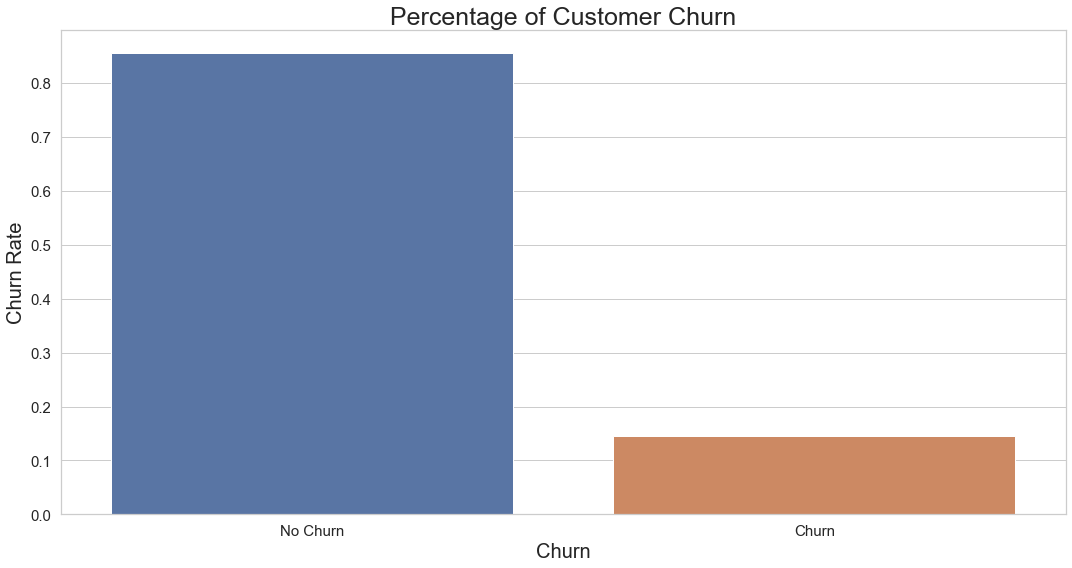

In [26]:
# Visualizing the churn rate

fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x = [0, 1], y = 'churn', data = churn_percentages, ax = ax)
plt.title('Percentage of Customer Churn', fontsize = 25)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Churn', fontsize = 20)
plt.ylabel('Churn Rate', fontsize = 20)
ax.set_xticklabels(['No Churn', 'Churn'])
plt.tight_layout()

## Churn by Area Code

Checking if there is significant churn within a particular area code

In [27]:
df.head()

,state,account_lengths,area_code,phone_number,intl_plan,vmail_plan,number_vmail_messages,total_day_mins,total_day_calls,total_day_charge,...,total_night_mins,total_night_calls,total_night_charge,total_intl_mins,total_intl_calls,total_intl_charge,cust_serv_calls,churn,above_threshold,cumm_daily_charge
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,False,True,75.56
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,False,True,59.24
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,False,True,62.29
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,False,False,66.80
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,False,False,52.09


In [28]:
df['area_code'].unique()

array([415, 408, 510], dtype=int64)

area_code
408    0.145585
415    0.142598
510    0.148810
Name: churn, dtype: float64


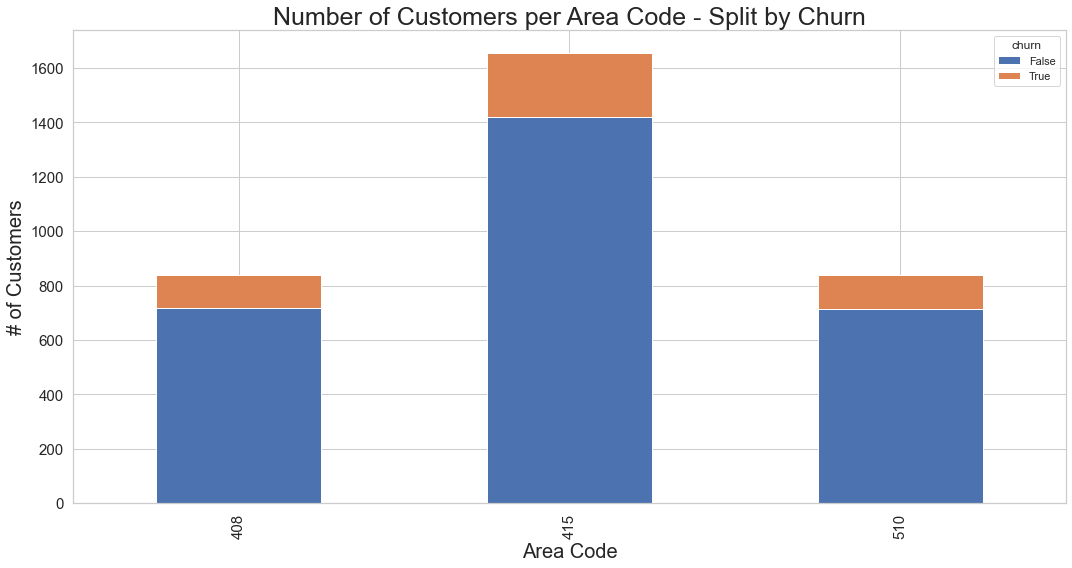

In [29]:
# percentage of churn by area code
print(df.groupby(["area_code"])['churn'].mean())

fig, ax = plt.subplots(figsize = (15, 8))
df.groupby(['area_code', 'churn']).size().unstack().plot(kind='bar', stacked=True, ax = ax);
plt.title('Number of Customers per Area Code - Split by Churn', fontsize = 25)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Area Code', fontsize = 20)
plt.ylabel('Number of Customers', fontsize = 20)
plt.tight_layout()


Area code 415 has the highest number of customers but it maintains the same churn rate. The Churn rate is confirmed again to be around 14%. It is the same rate in all 3 area codes, due to this, we will drop the column in the modelling section.  

In [30]:
# Checking unique values in states
df['state'].value_counts()

WV    106
MN     84
NY     83
AL     80
OR     78
OH     78
WI     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
KS     70
MD     70
NJ     68
NC     68
MT     68
CO     66
NV     66
WA     66
MS     65
MA     65
RI     65
AZ     64
MO     63
FL     63
ME     62
NM     62
ND     62
OK     61
DE     61
NE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

# **Modelling**

- The first model will be a simple baseline <br>
- Feature selction will then be done and the highlighted features will undergo an Exploratory Data Analysis to gain insights on how they relate with customer churn.<br>
- The models after this will be tuned sequentially until an model with optimum performance is reached. 

In [31]:
df.head()

,state,account_lengths,area_code,phone_number,intl_plan,vmail_plan,number_vmail_messages,total_day_mins,total_day_calls,total_day_charge,...,total_night_mins,total_night_calls,total_night_charge,total_intl_mins,total_intl_calls,total_intl_charge,cust_serv_calls,churn,above_threshold,cumm_daily_charge
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,False,True,75.56
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,False,True,59.24
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,False,True,62.29
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,False,False,66.80
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,False,False,52.09


In [32]:
# Making a copy of the data frame 
copydf = df.copy()
copydf.head()

,state,account_lengths,area_code,phone_number,intl_plan,vmail_plan,number_vmail_messages,total_day_mins,total_day_calls,total_day_charge,...,total_night_mins,total_night_calls,total_night_charge,total_intl_mins,total_intl_calls,total_intl_charge,cust_serv_calls,churn,above_threshold,cumm_daily_charge
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,False,True,75.56
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,False,True,59.24
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,False,True,62.29
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,False,False,66.80
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,False,False,52.09


In [33]:
# Dropping area_code feature
copydf.drop('area_code', axis = 1, inplace = True)
copydf.head()

,state,account_lengths,phone_number,intl_plan,vmail_plan,number_vmail_messages,total_day_mins,total_day_calls,total_day_charge,total_eve_mins,...,total_night_mins,total_night_calls,total_night_charge,total_intl_mins,total_intl_calls,total_intl_charge,cust_serv_calls,churn,above_threshold,cumm_daily_charge
0,KS,128,382-4657,no,yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,False,True,75.56
1,OH,107,371-7191,no,yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,False,True,59.24
2,NJ,137,358-1921,no,no,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,False,True,62.29
3,OH,84,375-9999,yes,no,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,False,False,66.80
4,OK,75,330-6626,yes,no,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,False,False,52.09


In [34]:
#Dropping the phone number feature
copydf.drop('phone_number', axis = 1, inplace = True)
copydf.head()

,state,account_lengths,intl_plan,vmail_plan,number_vmail_messages,total_day_mins,total_day_calls,total_day_charge,total_eve_mins,total_eve_calls,...,total_night_mins,total_night_calls,total_night_charge,total_intl_mins,total_intl_calls,total_intl_charge,cust_serv_calls,churn,above_threshold,cumm_daily_charge
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,...,244.7,91,11.01,10.0,3,2.70,1,False,True,75.56
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,...,254.4,103,11.45,13.7,3,3.70,1,False,True,59.24
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,...,162.6,104,7.32,12.2,5,3.29,0,False,True,62.29
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,...,196.9,89,8.86,6.6,7,1.78,2,False,False,66.80
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,...,186.9,121,8.41,10.1,3,2.73,3,False,False,52.09


In [35]:
# Changing international plan fron "yes" and "no" to binary

copydf.intl_plan.replace(('yes', 'no'), (1, 0), inplace = True)

In [36]:
# Changing voicemail plan fron "yes" and "no" to binary

copydf.vmail_plan.replace(('yes', 'no'), (1, 0), inplace = True)

copydf.head()

,state,account_lengths,intl_plan,vmail_plan,number_vmail_messages,total_day_mins,total_day_calls,total_day_charge,total_eve_mins,total_eve_calls,...,total_night_mins,total_night_calls,total_night_charge,total_intl_mins,total_intl_calls,total_intl_charge,cust_serv_calls,churn,above_threshold,cumm_daily_charge
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,...,244.7,91,11.01,10.0,3,2.70,1,False,True,75.56
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,...,254.4,103,11.45,13.7,3,3.70,1,False,True,59.24
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,...,162.6,104,7.32,12.2,5,3.29,0,False,True,62.29
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,...,196.9,89,8.86,6.6,7,1.78,2,False,False,66.80
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,...,186.9,121,8.41,10.1,3,2.73,3,False,False,52.09


## Train, Test Split

Splitting the data into trainig and test sets with 80 percent going to train the model and the remaining 20 percent for testing

In [37]:
# create X:
X = copydf.drop('churn', axis = 1)

# create y:
y = copydf.churn

In [38]:
# initial split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### One hot encoding the state column

In [39]:
# Instantiating ohe object
ohe = OneHotEncoder(sparse = False, handle_unknown = "ignore")

# fit ohe on train data
ohe.fit(X_train[['state']])


col_names = ohe.categories_[0]


# Creating a new dataframe with encoded states
train_state_encoded = pd.DataFrame(ohe.transform(X_train[["state"]]), 
                               index = X_train.index, 
                               columns = col_names)

# Concatinating encoded states with X_train and droping old 'state' column
X_train = pd.concat([X_train.drop("state", axis = 1), train_state_encoded], axis = 1)

X_train.head()

,account_lengths,intl_plan,vmail_plan,number_vmail_messages,total_day_mins,total_day_calls,total_day_charge,total_eve_mins,total_eve_calls,total_eve_charge,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
817,243,0,0,0,95.5,92,16.24,163.7,63,13.91,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1373,108,0,0,0,112.0,105,19.04,193.7,110,16.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
679,75,1,0,0,222.4,78,37.81,327.0,111,27.80,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,141,0,0,0,126.9,98,21.57,180.0,62,15.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1993,86,0,0,0,216.3,96,36.77,266.3,77,22.64,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Baseline Model 

Using Decision Tree Classifier as the base model. Max Depth will be 5 to avoid overfitting. 

In [40]:
# Create the classifier, fit it on the training data and make predictions on the tes
clf = DecisionTreeClassifier(max_depth = 5, random_state = 42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [41]:
# One-hot encode the test set
X_test_encoded = pd.DataFrame(ohe.transform(X_test[["state"]]), 
                              index=X_test.index, 
                              columns=col_names)

# Concatenating encoded states with X_test and drop the old 'state' column
X_test = pd.concat([X_test.drop("state", axis=1), X_test_encoded], axis=1)

# Making predictions on the test set
y_preds = clf.predict(X_test)

# Evaluating using recall and accuracy scores
from sklearn.metrics import accuracy_score, recall_score

accuracy = accuracy_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)

# Displaying results
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.98
Recall: 0.87


## Feature Selection

Using Decision Tree classifier's feature importances method to establish the most releavant features, then create a new Decision Tree with the selected features to cheeck how it performs aganist the base model.

In [42]:
from sklearn.feature_selection import SelectFromModel

# Feature importance from the trained Decision Tree
feature_importance = clf.feature_importances_

# Selecting features with importance above 0.1 threshold
threshold = 0.1  
sfm = SelectFromModel(clf, threshold=threshold, prefit=True)

# Transforming the training and test sets
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# Showing the selected features
selected_feature_names = X_train.columns[sfm.get_support()]
print("Selected Features:", selected_feature_names)



Selected Features: Index(['number_vmail_messages', 'cust_serv_calls', 'cumm_daily_charge'], dtype='object')


## Exploratory Data Analysis of the top features selected

<ipython-input-53-96e8c3f41ff9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned_data['number_vmail_messages_range'] = pd.cut(churned_data['number_vmail_messages'], bins=bins, right=False)


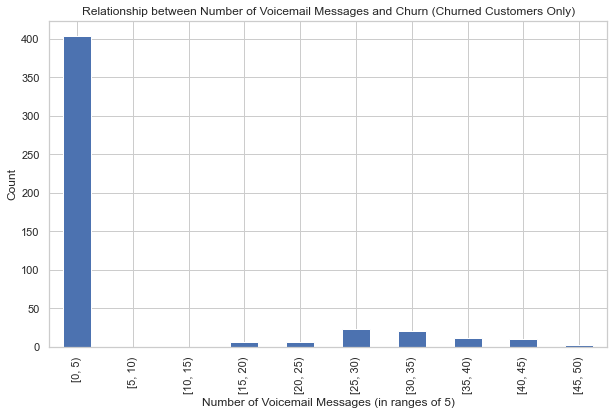

In [53]:
# Filter the DataFrame to include only instances where churn is True
churned_data = copydf[copydf['churn'] == 1]

# Create bins for number_vmail_messages in ranges of 5 from 0 to 50
bins = np.arange(0, 51, 5)

# Cut the data into the specified bins
churned_data['number_vmail_messages_range'] = pd.cut(churned_data['number_vmail_messages'], bins=bins, right=False)

# Calculate counts for each bin
counts_number_vmail_messages_churned = churned_data['number_vmail_messages_range'].value_counts().sort_index()

# Plot the bar plot
counts_number_vmail_messages_churned.plot(kind='bar', figsize=(10, 6))
plt.title('Relationship between Number of Voicemail Messages and Churn (Churned Customers Only)')
plt.xlabel('Number of Voicemail Messages (in ranges of 5)')
plt.ylabel('Count')
plt.show()

- From the plot above,most customers who churned made less than 5 voicemail messages. <bt>
- Checking if customers who churned have a voicemail plan or not

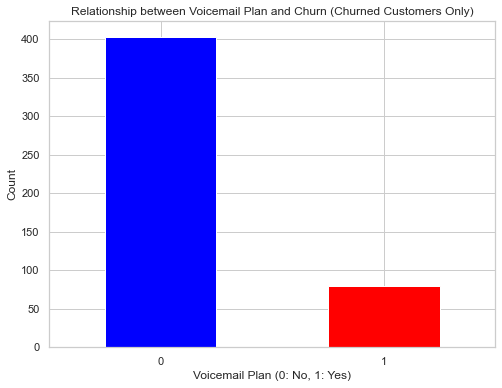

In [63]:
# Filter the DataFrame to include only instances where churn is True
churned_data = copydf[copydf['churn'] == 1]

# Calculate counts for each value of 'vmail_plan'
counts_vmail_plan_churned = churned_data['vmail_plan'].value_counts()

# Plot the bar plot
counts_vmail_plan_churned.plot(kind='bar', figsize=(8, 6), color=['blue', 'red'])
plt.title('Relationship between Voicemail Plan and Churn (Churned Customers Only)')
plt.xlabel('Voicemail Plan (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

From this Voicemail plan vs customers who churned plot, we can see most of them did not have a Voicemail Plan which explains the low number of voicemails made.

Relationship between Number of Customer Service Calls and customers who churned

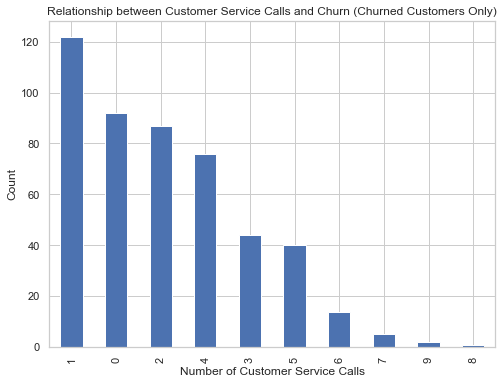

In [52]:
churned_data = copydf[copydf['churn'] == True]

# Calculate counts for each value of 'cust_serv_calls' for churned customers
counts_cust_serv_calls_churned = churned_data['cust_serv_calls'].value_counts()

# Plot the bar plot
counts_cust_serv_calls_churned.plot(kind='bar', figsize=(8, 6))
plt.title('Relationship between Customer Service Calls and Churn (Churned Customers Only)')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Count')
plt.show()

From the plot above, we can see that 
- Most customers who churned only made 1 call to the customer service. 
- More than half the churned customers made less than 4 calls.

Interpretation:
- One interpretation could be, the customer did not get the needed assistance from the customer service team in their first call, and decided to churn
 
- A second interpretation could be the customer service agents are usually not available leading to long holding times for customers. The customer could eventually give up waiting/caling again and decide to try out a competitor telecom service provider.

<ipython-input-54-bb22615624af>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned_data['cumm_daily_charge_range'] = pd.cut(churned_data['cumm_daily_charge'], bins=bins, right=False)


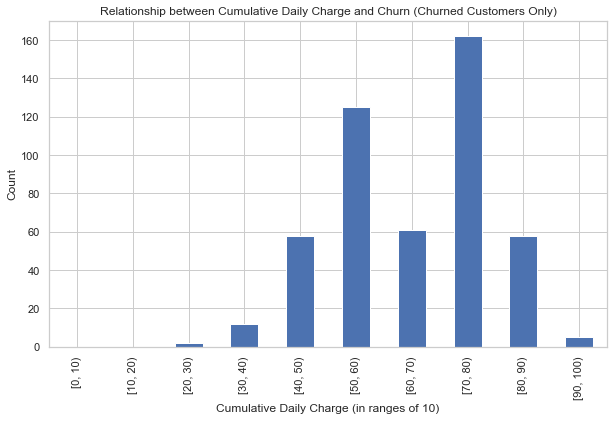

In [54]:
# Create bins for cumm_daily_charge in ranges of 10 from 0 to 100
bins = np.arange(0, 101, 10)

# Cut the data into the specified bins
churned_data['cumm_daily_charge_range'] = pd.cut(churned_data['cumm_daily_charge'], bins=bins, right=False)

# Calculate counts for each bin
counts_cumm_daily_charge_churned = churned_data['cumm_daily_charge_range'].value_counts().sort_index()

# Plot the bar plot
counts_cumm_daily_charge_churned.plot(kind='bar', figsize=(10, 6))
plt.title('Relationship between Cumulative Daily Charge and Churn (Churned Customers Only)')
plt.xlabel('Cumulative Daily Charge (in ranges of 10)')
plt.ylabel('Count')
plt.show()

- From the bar plot above, most customers who churned had high cummulative charges per day. <br>
- High charges above the competitors rate could lead to high churn rate.

Getting the actual charges per call from a cutomer in the dataset

In [69]:
# Calculate charge per minute for international calls
charge_per_minute_intl = 2.7  / 10

# Calculate charge per minute for night calls
charge_per_minute_night = 11.01 / 244

# Calculate charge per minute for day calls
charge_per_minute_day= 16.24/ 95

# Display the DataFrame with the new columns
print("Charge per minute for International calls:", charge_per_minute_intl)
print(f"Charge per minute for Day calls:{charge_per_minute_day: .2f}" )
print(f"Charge per minute for Night calls:{charge_per_minute_night: .2f}" )



Charge per minute for International calls: 0.27
Charge per minute for Day calls: 0.17
Charge per minute for Night calls: 0.05


## Model 1: Decision Tree with selected features

### Visualizing feature importance in ascending order

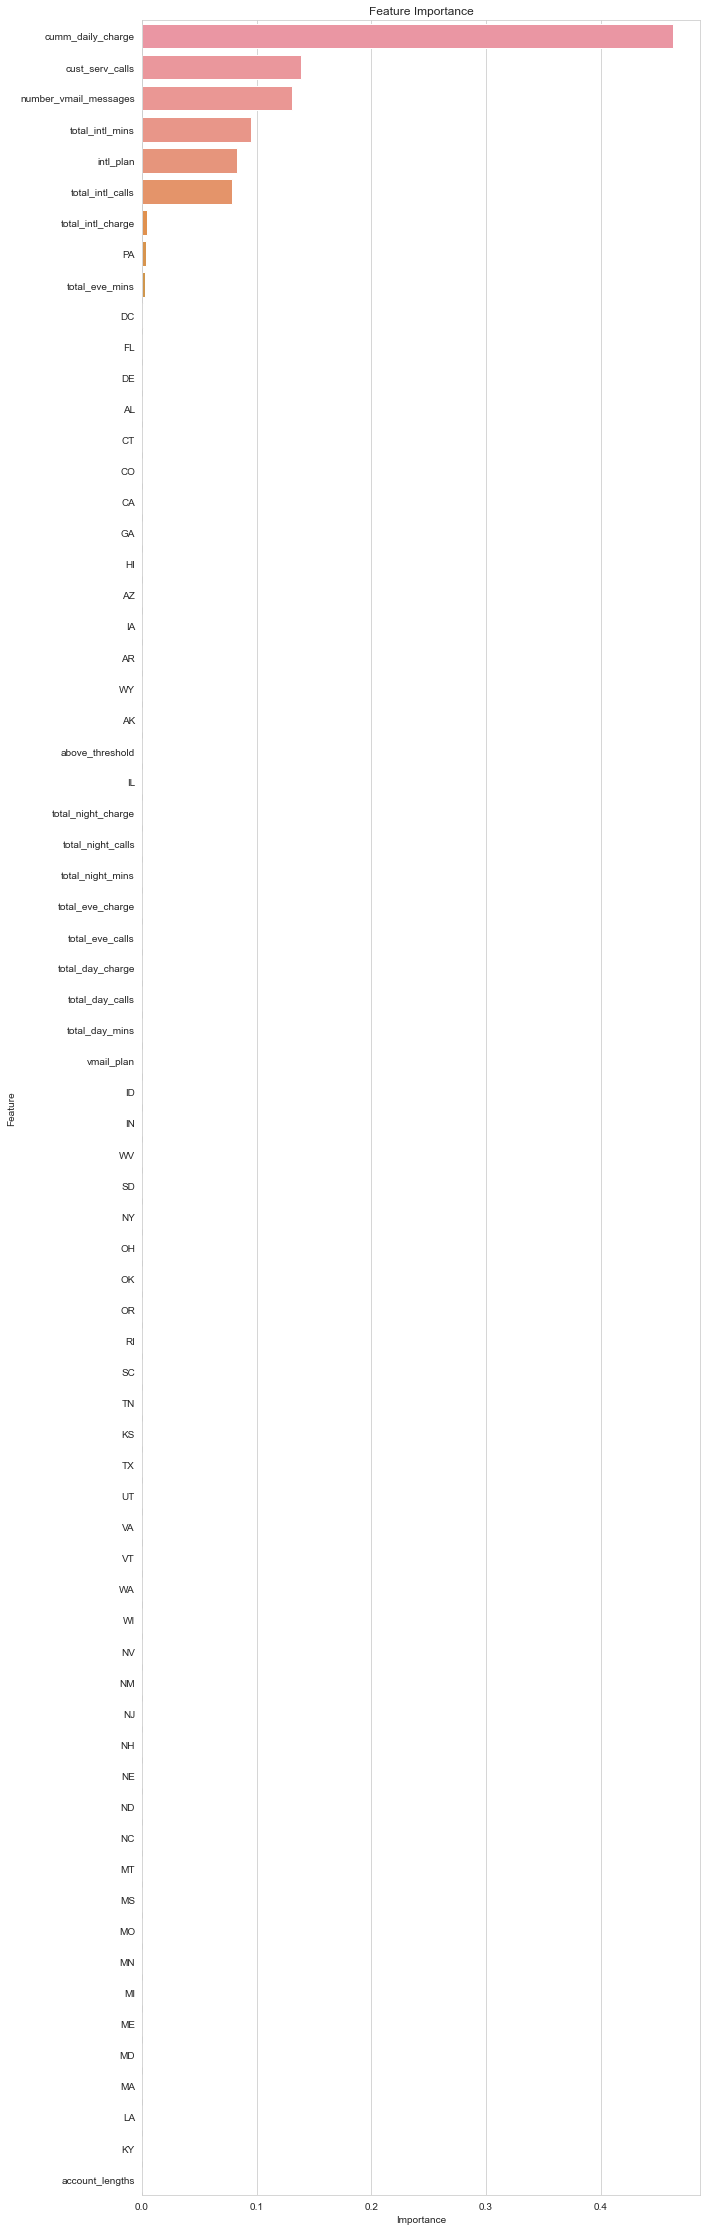

In [95]:
# Ploting feature importance
plt.figure(figsize=(10, 40))
sns.barplot(x=feature_importance, y=X_train.columns, order=X_train.columns[np.argsort(feature_importance)[::-1]])
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

From the plot above, the most important feature is our engineered cummulative daily charge which sums up a customers total charges. 
The other most important features from the plot include 
- Customer service calls
- Number of voicemail messages
- Total international minutes
- International plan
- Total international calls

Creating new Decision Tree model using the top selected features

In [96]:
# Creating a new Decision Tree classifier using the selected features
clf_selected = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_selected.fit(X_train_selected, y_train)

# Making predictions on the test set using the model with selected features
y_preds_selected = clf_selected.predict(X_test_selected)

# Evaluation
accuracy_selected = accuracy_score(y_test, y_preds_selected)
recall_selected = recall_score(y_test, y_preds_selected)

# Displaying scores
print("\nResults with Selected Features:")
print(f"Accuracy: {accuracy_selected:.2f}")
print(f"Recall: {recall_selected:.2f}")



Results with Selected Features:
Accuracy: 0.95
Recall: 0.68


In [97]:
#important_features = [['number_vmail_messages', 'cust_serv_calls', 'cumm_daily_charge', 'total_intl_mins', 'intl_plan','total_intl_calls']]

## Model 3: Decision Tree with best threshold

### Using Cross Validation to determine best threshold

Plotting a graph of Cross Validated Accuracy aganist Thresholds that range from 0 to 0.2

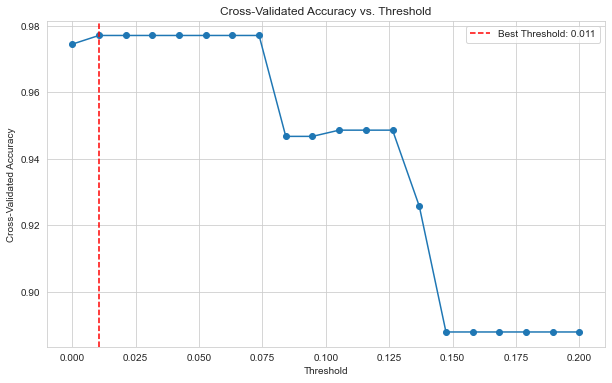

Best Threshold: 0.011


In [98]:
thresholds = np.linspace(0, 0.2, 20) 

# Performing cross-validated feature selection for each threshold
cv_scores = []

for threshold in thresholds:
    sfm = SelectFromModel(clf, threshold=threshold, prefit=True)
    X_train_selected = sfm.transform(X_train)
    cv_result = cross_val_score(clf, X_train_selected, y_train, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(cv_result))

# Finding the threshold that maximizes cross-validated accuracy
best_threshold = thresholds[np.argmax(cv_scores)]

# Ploting the cross-validated accuracy for different thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, cv_scores, marker='o')
plt.title("Cross-Validated Accuracy vs. Threshold")
plt.xlabel("Threshold")
plt.ylabel("Cross-Validated Accuracy")
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Best Threshold: {best_threshold:.3f}')
plt.legend()
plt.show()


print(f"Best Threshold: {best_threshold:.3f}")

The threshold that maximizes the cross-validated accuracy from the plot above is 0.011.

In [99]:
# Creating a new Decision Tree classifier using the best threshold
sfm2 = SelectFromModel(clf, threshold=0.011, prefit=True)
X_train_selected2 = sfm2.transform(X_train)

clf_selected2 = DecisionTreeClassifier(random_state=42)
clf_selected2.fit(X_train_selected2, y_train)


X_test_selected2 = sfm2.transform(X_test)

# Predictions
y_preds_selected2 = clf_selected2.predict(X_test_selected2)

# Evaluation
accuracy_selected2 = accuracy_score(y_test, y_preds_selected2)
recall_selected2 = recall_score(y_test, y_preds_selected2)


print("Results with the Best Threshold:")
print(f"Accuracy: {accuracy_selected2:.3f}")
print(f"Recall: {recall_selected2:.3f}")

Results with the Best Threshold:
Accuracy: 0.951
Recall: 0.871


## Model 4: Random Forest

In [111]:
# Creating a Random Forest classifier
rf_classifier_selected2 = RandomForestClassifier(random_state=42)

# Fit the model on the selected features from the training set
rf_classifier_selected2.fit(X_train_selected2, y_train)

# Transform the test set using the same feature selection
X_test_selected2 = sfm2.transform(X_test)

# Predictions
y_preds_rf_selected2 = rf_classifier_selected2.predict(X_test_selected2)

# Evaluation
accuracy_rf_selected2 = accuracy_score(y_test, y_preds_rf_selected2)
recall_rf_selected2 = recall_score(y_test, y_preds_rf_selected2)
# Scores report
rf_classification_rep2 = classification_report(y_test, y_preds_rf_selected2)


print("Random Forest Performance on Selected Features:")
print(f"Accuracy: {accuracy_rf_selected2:.4f}")
print(f"Recall: {recall_rf_selected2:.4f}")
print("Classification Report:\n", rf_classification_rep2)

Random Forest Performance on Selected Features:
Accuracy: 0.9805
Recall: 0.8713
Classification Report:
               precision    recall  f1-score   support

       False       0.98      1.00      0.99       566
        True       1.00      0.87      0.93       101

    accuracy                           0.98       667
   macro avg       0.99      0.94      0.96       667
weighted avg       0.98      0.98      0.98       667



In [112]:
# Confusion Matrix
conf_matrix_rf_selected2 = confusion_matrix(y_test, y_preds_rf_selected2)

# F1 Score
f1_rf_selected2 = f1_score(y_test, y_preds_rf_selected2)


print("Confusion Matrix:")
print(conf_matrix_rf_selected2)


print(f"F1 Score: {f1_rf_selected2:.4f}")

Confusion Matrix:
[[566   0]
 [ 13  88]]
F1 Score: 0.9312


In [118]:
# Creating a Random Forest classifier
rf_classifier_cv = RandomForestClassifier(random_state=42)

# Performing cross-validation with recall and F1 score
cv_recall_scores = cross_val_score(rf_classifier_cv, X_train_selected2, y_train, cv=5, scoring='recall')
cv_f1_scores = cross_val_score(rf_classifier_cv, X_train_selected2, y_train, cv=5, scoring='f1')


print("Cross-Validation Scores (Recall):", cv_recall_scores)
print("Mean Recall:", np.mean(cv_recall_scores))

print("Cross-Validation Scores (F1 Score):", cv_f1_scores)
print("Mean F1 Score:", np.mean(cv_f1_scores))

Cross-Validation Scores (Recall): [0.8961039  0.84210526 0.88157895 0.80263158 0.85714286]
Mean Recall: 0.8559125085440875
Cross-Validation Scores (F1 Score): [0.94520548 0.91428571 0.93706294 0.89051095 0.92307692]
Mean F1 Score: 0.9220284005565478


## Model 5: Grid Search

In [102]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],           
    'max_depth': [None, 10, 20, 30],          
    'min_samples_split': [2, 5, 10],          
    'min_samples_leaf': [1, 2, 4],            
    'max_features': ['auto', 'sqrt', 'log2']  
}

# Creating a Random Forest classifier
rf_classifier_tuned = RandomForestClassifier(random_state=42)

# Instantiating GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier_tuned, param_grid=param_grid, scoring='recall', cv=5)

# Fiting the model 
grid_search.fit(X_train_selected2, y_train)

# Getting the best parameters
best_params = grid_search.best_params_




Tuned Random Forest Performance on Selected Features:
Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.98
Recall: 0.87


In [115]:
# Using the best model for predictions
best_rf_classifier = grid_search.best_estimator_
y_preds_rf_tuned = best_rf_classifier.predict(X_test_selected2)

# Evaluation
accuracy_rf_tuned = accuracy_score(y_test, y_preds_rf_tuned)
recall_rf_tuned = recall_score(y_test, y_preds_rf_tuned)


print("Tuned Random Forest Performance on Selected Features:")
print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy_rf_tuned:.4f}")
print(f"Recall: {recall_rf_tuned:.4f}")

Tuned Random Forest Performance on Selected Features:
Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9805
Recall: 0.8713


In [116]:


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_preds_rf_tuned)

# F1 Score
f1_rf_tuned = f1_score(y_test, y_preds_rf_tuned)


print("Confusion Matrix:")
print(conf_matrix)


print(f"F1 Score: {f1_rf_tuned:.4f}")

Confusion Matrix:
[[566   0]
 [ 13  88]]
F1 Score: 0.9312


Cross validation

To assess the model's performance and ensure its robustness across different subsets of the data

In [109]:


# Creating a Random Forest classifier with the best parameters
best_rf_classifier_cv = RandomForestClassifier(**best_params, random_state=42)

# Convert NumPy arrays to DataFrames without specifying columns
X_train_selected2_df = pd.DataFrame(X_train_selected2)
X_test_selected2_df = pd.DataFrame(X_test_selected2)

# Combine the selected features and target variable for cross-validation
X_combined_cv = pd.concat([X_train_selected2_df, X_test_selected2_df], axis=0)
y_combined_cv = pd.concat([y_train, y_test], axis=0)

# Perform cross-validation
cv_scores_recall = cross_val_score(best_rf_classifier_cv, X_combined_cv, y_combined_cv, cv=5, scoring='recall')
cv_scores_f1 = cross_val_score(best_rf_classifier_cv, X_combined_cv, y_combined_cv, cv=5, scoring='f1')

# Display cross-validation scores
print("Cross-Validation Scores (Recall):", cv_scores_recall)
print("Mean Recall:", np.mean(cv_scores_recall))
print("Cross-Validation Scores (F1 Score):", cv_scores_f1)
print("Mean F1 Score:", np.mean(cv_scores_f1))

Cross-Validation Scores (Recall): [0.8556701  0.88659794 0.83505155 0.84375    0.86458333]
Mean Recall: 0.8571305841924399
Cross-Validation Scores (F1 Score): [0.92222222 0.93989071 0.91011236 0.91525424 0.9273743 ]
Mean F1 Score: 0.9229707662238823


**Interpretation:** <br>

The accuracy, confusion matrix, and F1 score remained almost identical before and after grid search. This suggests that the hyperparameter tuning did not result in significant changes in the model's performance. This could mean that the model is at its optimal performance

**Key Observations:** <br>

High Accuracy:<br>
The model exhibits high accuracy, correctly classifying a large portion of instances.
Recall: <br>
The recall is consistently high at 0.87, indicating that the model effectively identifies a significant portion of true positive instances (churn). Recall is particularly important in this scenario since identifying all instances of churn is crucial.
Confusion Matrix:<br>
The confusion matrix shows a high number of true positives (88) and true negatives (566) with no false positives (FP = 0). The model has 0 false positive, this is very beneficial, indicating that the model is not incorrectly classifying non-churn instances as churn.
F1 Score: <br>
The F1 score remains high at 0.931, emphasizing a good balance between precision and recall.

**Summary:**<br>

The model appears to be performing well both before and after grid search, with a focus on correctly identifying instances of churn (high recall) and maintaining a balance between precision and recall (high F1 score). Further adjustments can be considered based on specific business requirements and trade-offs

# Conclusion

**Original Random Forest Model:**

Accuracy: 0.9805 <br>
Recall: 0.8713 <br>
F1 Score: 0.9312 <br>
Cross-Validation Mean Recall: 0.8559<br>
Cross-Validation Mean F1 Score: 0.9220<br>


**Grid Search Tuned Random Forest Model:**

Accuracy: 0.9805 <br>
Recall: 0.8713 <br>
F1 Score: 0.9312 <br>
Cross-Validation Mean Recall: 0.8571 <br>
Cross-Validation Mean F1 Score: 0.9230 <br>


**Considerations:**

Consistency:  Both models show consistent performance between the original and tuned versions. <br>
Cross-Validation:  The Grid Search tuned Random Forest model shows slighly better model generalization across different subsets <br>
Computational Efficiency:  Grid Search tuned Random Forest model is very resource intensive yet it only has marginal improvement over the performance of the original Random Forest 

**Decision:**

Given that the performance metrics (accuracy, recall, F1 score) and cross-validation results are very close between the original and tuned models, but the tuned model is resource heavy, it is best to go with the original Random Forest as the final model. 
